
![Image](./resources/cropped-SummerWorkshop_Header.png)

<h1 align="center">Encoding </h1> 
<h2 align="center"> Day 1, Exercises. SWDB 2023 </h2> 

<h3 align="center">Monday, August 21, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
There are more excersizes here than you can likely do in a afternoon. That said, please try a few of them - this is your first chance to use you newly minted Python skills to dig into a new data set! 
    
Remember, if you get stuck there are TAs all around to help you. Don't waste time beating your head against a problem. We are here to help!
    

In [4]:
# We need to import these modules to get started
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = '../data/allen-brain-observatory/visual-coding-2p/manifest.json'
boc = BrainObservatoryCache(manifest_file=manifest_file)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 1: Explore direction tuning. </h2>
     <p>
   
The workshops earlier today looked deeply at only a few examples of direction tuning in excitatory cells in primary visual cortex (Visp). Try digging a little deeper into the Brain Observatory data. 
</p>   

<p>
There is abolutly no right answer to this exercise, and everyone will end up with different adventure. 
</p>   
    
Some ideas include:
<ul>
  <li>Try a different brain area. </li>
  <li>Or try a different Cre line. Maybe an inhibitory line would be particularly interesting?</li>
  <li>Try adifferent imaging  depth.</li> 
  <li>Find a session with more running, or one where the mouse never runs.  </li> 
</ul>
   
<p> 
Do these areas/cre line/depths have direction tuning? Does it look different than in this mornings workshops? Are cells in the population more or less reliable?
</p>
    
<p>   
There is a very large search space. One strategy might be to team up with someone else so you can systematically try and compare a few different combinations.
</p>

To get you started, here is a quick refresher on how to query sessions in the data. We will go over two ways, one using the primarily the AllenSDK and the other outsourcing some of your queries to Pandas.

Recall: the BrainObservatoryCache will tell you all of the avalible brain areas, cre lines, etc.

In [6]:
print(boc.get_all_targeted_structures())
print(boc.get_all_cre_lines())

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']
['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Fezf2-CreER', 'Nr5a1-Cre', 'Ntsr1-Cre_GN220', 'Pvalb-IRES-Cre', 'Rbp4-Cre_KL100', 'Rorb-IRES2-Cre', 'Scnn1a-Tg3-Cre', 'Slc17a7-IRES2-Cre', 'Sst-IRES-Cre', 'Tlx3-Cre_PL56', 'Vip-IRES-Cre']


You can then use the Cache object to query for your session(s) of interest. 

If you unsure where to start, we recomend choosing an SST-IRES-Cre line. Here, expression of GCaMP is driven in SST-positive interneurons, a type of inhibitory cell. This will form a nice juxdeposition to the excitatory cell line use in this morning's example. 

One note: you may notice that there are relativly few inhibitory neurons in any given session. This is because there are proportionally fewer inhibitory cells in cortex, and therefore fewer in any experiments field of view.

In [7]:
sessions_list = boc.get_ophys_experiments(stimuli=['drifting_gratings'],
                                                            cre_lines = ['SSt-IRES-Cre'],
                                                            targeted_structures=['VISpm'])
sessions_table = pd.DataFrame(sessions_list)
sessions_table.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,603763073,325,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),102,603763385,three_session_A,323528,Sst-IRES-Cre;Ai148(CAM)-323528,True
1,639117196,375,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),97,639117194,three_session_A,340377,Sst-IRES-Cre;Ai148-340377,True
2,639251932,375,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),96,639251930,three_session_A,340854,Sst-IRES-Cre;Ai148-340854,True
3,599909878,300,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),111,599920955,three_session_A,315562,Sst-IRES-Cre;Ai148(CAM)-315562,False
4,603188560,275,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),103,602397921,three_session_A,321822,Sst-IRES-Cre;Ai148(CAM)-321822,False


From here, you can select a session ID to try using the code from this morning!

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 2: To df/f or not to df/f, that is the question. </h2>

In the workshop, we chose to use detected Ca2+ events to build our receptive fields and analyse our data. Did this matter? How might this have changed our results?
    
<p> To test this, find a few cells with known tuning behavior. Try building a tuning curve using both the df/f traces and the detected event magnitudes. What does this decision do to the tuning curves? In what situtations might this distinction matter more or less? </p> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 3: What else might be encoded in visual cortex?</h2>
   
    <p>
Remeber, these mice saw more then just driting grating stimuli! Lets see if we can learn about the spatial selectivity of these cells, that is, we can ask whether cells encode the spatial location of stimuli.
   
        <p>
To do this, we will use a stimulus set known as "locally sparse noise." Here, mice were shown movies consisting of a mostly grey screen with non-neighboring (locally sparse) black and white pixels positioned randomly (noise) on the screen. 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 3a: Get the dataset and look at the noise stimulus</h2>
    
First, lets get the session containing the locally sparse noise and plot a frame of the stimulus.

In [8]:
sessions_list = boc.get_ophys_experiments(experiment_container_ids= [637998953],
                                          stimuli=['locally_sparse_noise_8deg'],)
sessions_table = pd.DataFrame(sessions_list)
sessions_table

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,639254728,400,VISp,Fezf2-CreER,Ai148(TIT2L-GC6f-ICL-tTA2),100,637998953,three_session_C2,339839,Fezf2-CreER;Ai148-339839,False


In [9]:
# Load the dataset
session_id = sessions_table.id.values[0]
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=sessions_table.id.values[0])

In [10]:
# Get the stimulus table
stim_table = data_set.get_stimulus_table('locally_sparse_noise_8deg')
stim_table.head()

,frame,start,end
0,0,15343,15351
1,1,15351,15358
2,2,15359,15366
3,3,15366,15373
4,4,15374,15381


In [11]:
# Get the stimulus movie
# It is called the "stimulus template"
stimulus_template = data_set.get_stimulus_template('locally_sparse_noise_8deg')
stimulus_template.shape

(5584, 8, 14)

Text(0, 0.5, 'Y pixels')

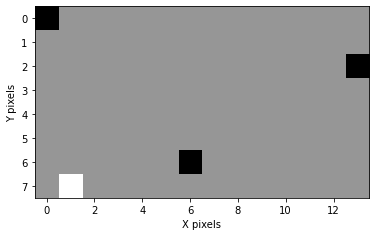

In [12]:
# Plot a single frame
fig,ax = plt.subplots()
ax.imshow(stimulus_template[0],cmap= 'Greys')
ax.set_xlabel('X pixels')
ax.set_ylabel('Y pixels')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 3b: Get per-trial responses  </h2>
    
Here, we need to make a decision about how to bin time for each trial. How large should the trial window be? Should it extend beyond the lenght of the trail? Why? 

In [223]:
# Load the events
events = boc.get_ophys_experiment_events(session_id)
num_cells = events.shape[0]

In [224]:
# Choose a window. 
# We will (somewhat arbitrarily) start with 15 frames, or about 1/2 secons
window = 15

In [225]:
# Get the average response amplitude on each trial
responses = np.zeros((len(stim_table),num_cells))
for ii,row in stim_table.iterrows():
    for cc in range(num_cells):
         responses[ii,cc] = events[cc,row.start:row.start+window].mean()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 3c: Build a design matrix using this stimulus</h2>
    
We can represent each frame in the 2 dimension image by "flattening" the image into the vector. Stacking these vectors will allow us to build a design matrix.

In [226]:
# What is the shape of one frame?
stimulus_template[0].shape

(8, 14)

In [227]:
# What does this look like flattened?
flat_stim = stimulus_template[0].flatten()
flat_stim.shape

(112,)

Text(0, 0.5, 'pixel intensity')

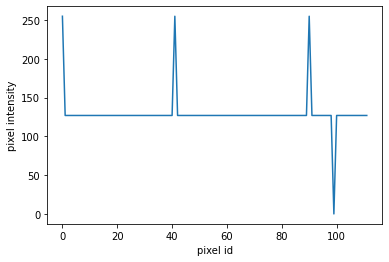

In [228]:
fig,ax = plt.subplots()
ax.plot(flat_stim)
ax.set_xlabel('pixel id')
ax.set_ylabel('pixel intensity')

In [229]:
# Do this for every trial
design_matrix = np.zeros((len(stim_table),len(flat_stim)))
for ii in range(len(stim_table)):
    design_matrix[ii,:] = stimulus_template[ii].flatten()
design_matrix

array([[255., 127., 127., ..., 127., 127., 127.],
       [127., 127., 127., ..., 127., 127., 127.],
       [127., 127., 127., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 127., 127., 127.],
       [127., 127., 127., ..., 127., 127.,   0.],
       [127., 127., 127., ..., 127., 127., 127.]])

In [230]:
# For ease of interpetability, change white values to 1s, greys to 0, and blacks to -1:
design_matrix[design_matrix==255] = 1
design_matrix[design_matrix==0] = -1
design_matrix[design_matrix==127]=0



Text(0, 0.5, 'pixel intensity')

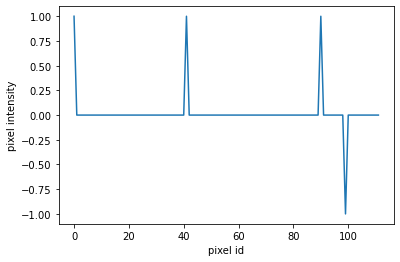

In [231]:
# Check that worked
fig,ax = plt.subplots()
plt.plot(design_matrix[0,:])
ax.set_xlabel('pixel id')
ax.set_ylabel('pixel intensity')

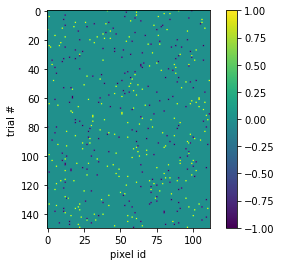

In [232]:
# what does this look like?
# Its too big to plot the whole thing, but lets look at a section
fig,ax = plt.subplots()
h = ax.imshow(design_matrix[:150,:])
ax.set_xlabel('pixel id')
ax.set_ylabel('trial #')
plt.colorbar(h)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 3d: Split your data into training and testing sets</h2>

In [233]:
# Import model fitting code
from sklearn.model_selection import train_test_split
# Split
train_matrix,test_matrix,train_response,test_response = train_test_split(design_matrix,responses,test_size=.5
                                                                        )

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 3e: Fit a model. </h2>
    
<p>
We recomend cell_specimine_id  = 662194111, but try several!
   
    <p>
Try plotting the model coefficients. Because we flattened the stimulus frame early, you will need to use np.reshape to get the vectorized coefficients back into the shape of the original frame in the stimulus template. What does the pattern tell you? 
        


In [234]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()


In [259]:
cell_idx = data_set.get_cell_specimen_indices([662194111])


In [260]:
# Fit model
LR.fit(train_matrix,train_response[:,cell_idx])
# Get the coefs
coef = LR.coef_.reshape(stimulus_template[0].shape)

# Print scores
print('R^2 train-->train: ' + str(LR.score(train_matrix,train_response[:,cell_idx])))
print('R^2 train-->train: ' + str(LR.score(test_matrix,test_response[:,cell_idx])))

R^2 train-->train: 0.1816551638629612
R^2 train-->train: 0.1456097708401708


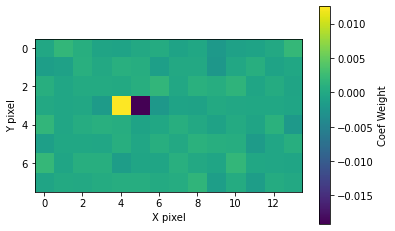

In [261]:
fig,ax = plt.subplots()
h = ax.imshow(coef)
cbar = plt.colorbar(h)
ax.set_xlabel('X pixel')
ax.set_ylabel('Y pixel')
cbar.set_label('Coef Weight')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 3f: Fit a model for all the cells in the session</h2>

<p> Plot the coefficients for the most and least reliable models. What do you notice about the population of responses?
   

In [262]:
train_r2 = np.zeros(num_cells)
test_r2 = np.zeros(num_cells)
coefs = np.zeros((num_cells,len(coef.flatten())))

for ii in range(num_cells):
    LR = LinearRegression()
    LR.fit(train_matrix,train_response[:,ii])
    # Get the coefs
    coefs[ii,:] = LR.coef_
    train_r2[ii] = LR.score(train_matrix,train_response[:,ii])
    test_r2[ii] = LR.score(test_matrix,test_response[:,ii])


Text(0, 0.5, 'Test R2')

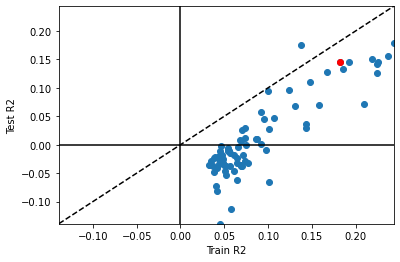

In [275]:
fig,ax = plt.subplots()
ax.scatter(train_r2,test_r2)
ax.scatter(train_r2[cell_idx],test_r2[cell_idx],c = 'r')

mnlim = np.min(np.concatenate([train_r2,test_r2]))
mxlim = np.max(np.concatenate([train_r2,test_r2]))

ax.set_xlim([mnlim,mxlim])
ax.set_ylim([mnlim,mxlim])
ax.axhline(0,c = 'k')
ax.axvline(0,c = 'k')
ax.plot([-1,1],[-1,1],'k--')
ax.set_xlabel('Train R2')
ax.set_ylabel('Test R2')

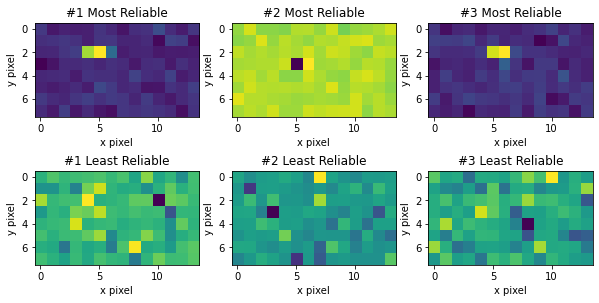

In [288]:
order = np.argsort(test_r2)
fig,ax = plt.subplots(ncols=3,nrows = 2,figsize = (10,5))
for ii in range(3):
    ax[0,ii].imshow(coefs[order[-(ii+1)],:].reshape(coef.shape))
    ax[0,ii].set_title('#'+str(ii+1) + ' Most Reliable')
    ax[0,ii].set_xlabel('x pixel')
    ax[0,ii].set_ylabel('y pixel')

for ii in range(3):
    ax[1,ii].imshow(coefs[order[ii],:].reshape(coef.shape))
    ax[1,ii].set_title('#'+str(ii+1) + ' Least Reliable')
    ax[1,ii].set_xlabel('x pixel')
    ax[1,ii].set_ylabel('y pixel')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 4: What else might be encoded in visual cortex?</h2>
    
Try to see if you can find a neuron that reliable encodes another of the presented stimulus sets. 
    
Some places to try:
<ul>
  <li>Tempral frequencies: We filtered this mornings data to select only one temporal frequncy. Was there temporal frequency tuning as well?</li>
  <li>Natural Scenes: Scenes were shown more than one time. Are there cells with consistant responses across presentations? </li>
  <li>Natural Movies: Are there cells with a consistant response timecourse as a move unfolds?</li>
</ul>
    
Answering each of these questions will require thoughts about the assumtions you make about the data. For example, what time window makes sense to use? Given the timecourse of Ca2+ data, should you include time after a stimulus for short presentations? Similarly, how might you bin data in a natural movie? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 5: Other ways to assess reliability</h2>
    
Problem description here!
    
But basically we will do bootstrapping

In [134]:
# Load data from workshop
import os
load_loc = os.path.join('/scratch','Workshop1')

orientation = np.load(os.path.join(load_loc,'orientation.npy'))
temp_freq = np.load(os.path.join(load_loc,'temp_freq.npy'))
mean_response_all = np.load(os.path.join(load_loc,'mean_response_all.npy'))

#filter for temp_freq = 1:
orientation = orientation[temp_freq==1]
mean_response_all = mean_response_all[temp_freq==1,:]
temp_freq = temp_freq[temp_freq==1]

# Get all orientations
orientations = np.unique(orientation)

In [133]:
# Define a fuction that computes DSI
def dsi(orivals, tuning):
    """
    Computes the direction selectivity of a cell. 
    See Ringbach 2002,
    Van Hooser 2014,
    De Vries 2019

    Parameters
    ----------
    ori_vals : complex array of length N
         Each value the oriention of the stimulus.
    tuning : float array of length N
        Each value the (averaged) response of the cell at a different
        orientation.

    Returns
    -------
    osi : float
        An N-dimensional array of the circular variance (scalar value,
        in radians) of the responses.
    """
    
    tuning_sum = tuning.sum()
    cv_top = tuning * np.exp(1j * orivals)
    return np.abs(cv_top.sum()) / tuning_sum

def compute_tuning_curve(mean_response,orientation,orientations):
    """
    Compute the tuning curve for a set of reponses and orientations
    
    Parameters
    ----------
    mean_response : np.array
        The mean response for each stimulus
    orientation : np.array
        Orientation of each stimulus
    orientations: np.array
        All orientations to compute tuning over
        Useful when a subset of orientations are needed.
    
    Returns
    -------
    tuning : np.array
        mean response at each orientation
    stdev: np.array 
        Standard deviation of responses at each orientation
    """
    tuning = np.zeros(orientations.shape)
    stdev = np.zeros(orientations.shape)
    for ii,ori in enumerate(orientations):
        tuning[ii] = mean_response[orientation==ori].mean()
        stdev[ii] = mean_response[orientation==ori].std()
    return tuning,stdev
    

In [132]:
# Lets grab the same cell we were using before
cell_idx = 17

In [148]:
# Compute the dsi for this cell. 
tuning,_ = compute_tuning_curve(mean_response_all[:,cell_idx],orientation,orientations)
true_dsi = dsi(orientations,tuning) 
# Note that here we used the full session whereas this morning we used only the first half, 
# which is why this number is not exactly the same.

In [144]:
n_shuffles= 10000
shuffled_dsi = np.zeros(n_shuffles)
for ii in range(n_shuffles):
    # Shuffle responses
    shuffled_responses = np.random.permutation(mean_response_all[:,cell_idx])
    # Compute tuning curve with shuffled data
    shuffled_tuning,_ = compute_tuning_curve(shuffled_responses,orientation,orientations)
    # And the dsi for the shuffled tuning
    shuffled_dsi[ii] = dsi(orientations,shuffled_tuning)

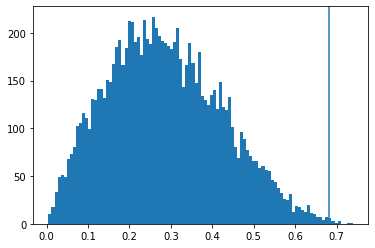

In [149]:
fig,ax = plt.subplots()
ax.hist(shuffled_dsi,100)
ax.axvline(true_dsi)
ax.set_xlabel()

In [295]:
pval = 1-np.sum(shuffled_dsi<=true_dsi)/(n_shuffles+1)
pval

0.0015998400159984438

In [316]:
num_cells =mean_response_all.shape[1]
true_dsi_all = np.zeros(num_cells) 
pvals = np.zeros(num_cells)

# For faster computations
n_shuffles = 1000

for ii in range(num_cells):# Loop through cells
    this_tuning,_ = compute_tuning_curve(mean_response_all[:,ii],orientation,orientations)
    true_dsi_all[ii] = dsi(orientations,this_tuning)
    shuffled_dsi = np.zeros(n_shuffles)
    
    for jj in range(n_shuffles):
        # Shuffle responses
        shuffled_responses = np.random.permutation(mean_response_all[:,ii])
        # Compute tuning curve with shuffled data
        shuffled_tuning,_ = compute_tuning_curve(shuffled_responses,orientation,orientations)
        # And the dsi for the shuffled tuning
        shuffled_dsi[jj] = dsi(orientations,shuffled_tuning)
    pvals[ii] = 1.-np.sum(shuffled_dsi<=true_dsi_all[ii])/(n_shuffles+1)
    print(pvals[ii])


0.1268731268731269
0.4355644355644356
0.0009990009990009652
0.003996003996003972
0.0019980019980020414
0.0009990009990009652
0.025974025974025983
0.6973026973026972
0.03596403596403597
0.7212787212787213
0.07492507492507494
0.10889110889110887
0.017982017982017928
0.28371628371628377
0.0009990009990009652
0.42357642357642356
0.03096903096903092
0.003996003996003972
0.25274725274725274
0.0009990009990009652
0.21178821178821183
0.6103896103896104
0.7162837162837163
0.004995004995005048
0.26173826173826176
0.020979020979020935
0.10989010989010994
0.16883116883116878
0.007992007992007943
0.09490509490509491
0.0009990009990009652
0.0569430569430569
0.28071928071928076
0.24975024975024973
0.4355644355644356
0.006993006993006978
0.0009990009990009652
0.13486513486513485
0.21678321678321677
0.00899100899100902
0.14385614385614387
0.13886113886113882
0.050949050949051
0.2257742257742258
0.011988011988012026
0.27472527472527475
0.0029970029970030065
0.026973026973026948
0.25274725274725274
0.991

Text(0, 0.5, '# Cells')

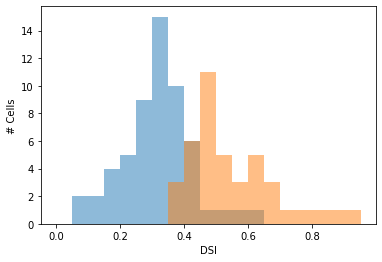

In [328]:
fig,ax = plt.subplots()
bins = np.arange(0,1,.05)
ax.hist(true_dsi_all[pvals>=.05],bins,alpha = .5,label = 'Not Sig')
ax.hist(true_dsi_all[pvals<.05],bins,alpha = .5,label = 'Not Sig')
ax.set_xlabel('DSI')
ax.set_ylabel('# Cells')
ax.legend(())

In [315]:
num_cells

119

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 6: Running speed as a categorical variable.</h2>
 
    <p>
    Earlier we carried our regression model treating running speed as a continuous variable. But, the difference between running and not running might be far more consequential than changes in the value of running speed per se. This would motivate treating running speed as categorical variable, just as we have treated the stimulus orientations.  
</p>   

<p>
Try repeating the regression analysis in this way. Do the results change? Is the answer sensitive to how we choose define our running threshold?
</p>   

In [13]:
# For simplicity, we'll demonstrate with the cell we used during the tutorial
expt_container_id = 564425775
cell_id = 570927732

boc = BrainObservatoryCache(manifest_file=manifest_file)
expt_session_info = boc.get_ophys_experiments(experiment_container_ids=[expt_container_id])
expt_session_info_df = pd.DataFrame(expt_session_info)

session_id = expt_session_info_df[expt_session_info_df.session_type=='three_session_A'].id.iloc[0]
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

#cell_idx = np.where(cell_id==gratings.cell_id)[0][0]
cell_idx = 10 # randoml cell

In [14]:
gratings = boc.get_ophys_experiment_analysis(ophys_experiment_id=session_id, stimulus_type='drifting_gratings')
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)#[cell_idx,:]
stim_table = gratings.stim_table

In [15]:
orientation = np.zeros((len(stim_table)))
temp_freq = np.zeros((len(stim_table)))
mean_response_all_cells = np.zeros((len(stim_table),len(gratings.cell_id)))

for ii in range(len(stim_table)):
    orientation[ii] = stim_table.orientation[ii]
    temp_freq[ii] = stim_table.temporal_frequency[ii]
    for cc in range(len(gratings.cell_id)):
        this_response =  events[cc,stim_table.start[ii]:stim_table.start[ii]+60]
        mean_response_all_cells[ii,cc] = this_response.mean()
        

In [16]:
orientation = orientation[temp_freq==2]
mean_response_all_cells = mean_response_all_cells[temp_freq==2,:]

In [36]:
# Build a matrix for every stimulus condition
stims = np.vstack([orientation]).T

# Each stimulus condition has a unique identity
stimuli,stim_index,counts = np.unique(stims,axis=0,return_counts=True,return_inverse=True)

# Confirm that there should be 8 unique stimuli
print(len(stimuli))

8


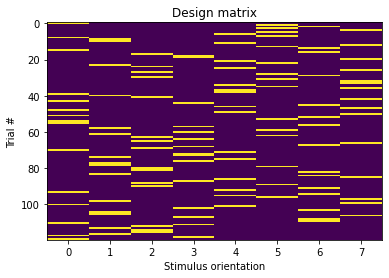

In [56]:
# Build the design matrix
X = np.zeros((len(stim_index),len(stimuli)))
for ii in range(len(stim_index)):
    X[ii,stim_index[ii]] = 1
    
fig,ax = plt.subplots()
ax.imshow(X,aspect='auto',interpolation='nearest')
ax.set_xlabel('Stimulus orientation')
ax.set_ylabel('Trial #')
plt.title('Design matrix')

plt.show()

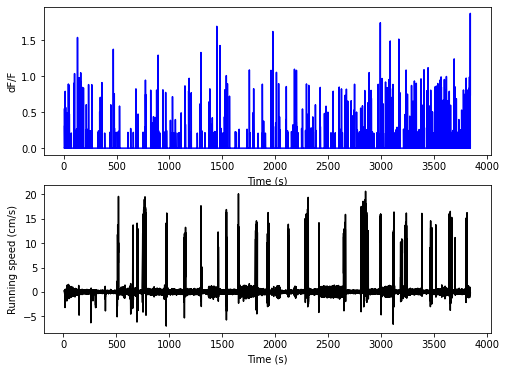

In [38]:
from scipy import signal

# Load running speed
dx, dxtime = data_set.get_running_speed()

# We'll need to reapply our median filter
dx = signal.medfilt(dx,3)

# Let's plot running speed alongside the calcium trace we've been studying.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('dF/F')
ax1.plot(gratings.timestamps, events[cell_idx,:], color='b')

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Running speed (cm/s)')
ax2.plot(dxtime, dx, color='k')

plt.show()

In [39]:
spd = np.zeros((len(stim_index),60))
for ii in range(len(stim_index)):
    spd[ii,:] = dx[stim_table.start[ii]:stim_table.start[ii]+60]

mean_spd = spd.mean(axis=1) # mean speed during each trial
run_mask = mean_spd>0
still_mask = mean_spd<=0

In [40]:
# Constructing a new design matrix, "Xspd", that now includes running mask.  

Xspd_continuous = np.concatenate((X,mean_spd.reshape(-1,1)), axis=1) # add column for run speed predictor (we won't bother with polynomial regression this time)
Xspd_categorical = np.concatenate((X,run_mask.reshape(-1,1)), axis=1) # add column for run_mask; note that still_mask is redundant with run_mask, so we can just use one of them


Text(0.5, 1.0, 'Design matrix (Categorical run speed)')

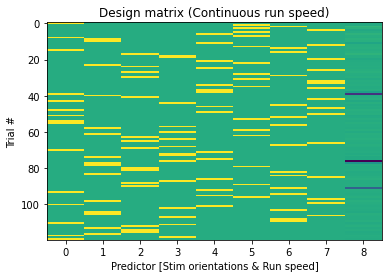

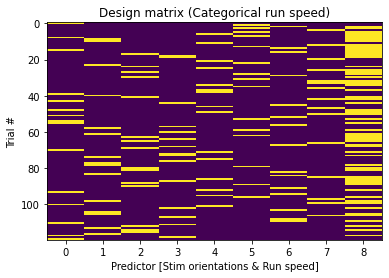

In [210]:
fig,ax = plt.subplots()
ax.imshow(Xspd_continuous,aspect='auto', interpolation='nearest')
ax.set_xlabel('Predictor [Stim orientations & Run speed]')
ax.set_ylabel('Trial #')
plt.title('Design matrix (Continuous run speed)')

fig,ax = plt.subplots()
ax.imshow(Xspd_categorical,aspect='auto',interpolation='nearest')
ax.set_xlabel('Predictor [Stim orientations & Run speed]')
ax.set_ylabel('Trial #')
plt.title('Design matrix (Categorical run speed)')

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
# Evaluate performance of continuous model

mean_response = mean_response_all_cells[:,cell_idx]

X_train, X_test, y_train, y_test = train_test_split(Xspd_continuous, mean_response, test_size=0.5, random_state=42)

rfmodel = LinearRegression(fit_intercept=False).fit(X_train, y_train,)

scr_train = rfmodel.score(X_train,y_train)
print('Continuous model R^2 on training set = ' + str(scr_train))

scr_test = rfmodel.score(X_test,y_test)
print('Continuous model R^2 on test set = ' + str(scr_test))

Continuous model R^2 on training set = 0.5045328184948914
Continuous model R^2 on test set = -2.977308371393021


In [44]:
# Evaluate performance of categorical model

X_train, X_test, y_train, y_test = train_test_split(Xspd_categorical, mean_response, test_size=0.5, random_state=42)

rfmodel = LinearRegression(fit_intercept=False).fit(X_train, y_train)

scr_train = rfmodel.score(X_train,y_train)
print('Categorical model R^2 on training set = ' + str(scr_train))

scr_test = rfmodel.score(X_test,y_test)
print('Categorical model R^2 on test set = ' + str(scr_test))

Categorical model R^2 on training set = 0.35932131464364947
Categorical model R^2 on test set = 0.1630796491929578


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 7: Systematic evaluation of orientation- and running-modulation.</h2>
 
    <p>
    Our regression analysis focused on just one arbitrarily selected cell. Presumably, our scientific question did not pertain to this specific cell in this specific mouse <i>per se</i>, but more generally, cells belonging to the visual cortex of mice. Accordingly, any conclusions drawn on the basis of our analysis depend critically on the degree to which our selected cell is representative of the this broader population.  
</p>   

<p>
In previous analyses, you've seen that things can look quite a bit different across different cells. For this exercise, try carrying out a more systematic investigation of tuning and running modulation of visual cortical cells. How  The goal is to obtain a better understanding of variability at the scale that our question concerns.
</p>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 8: Constructing a generalized linear model (GLM).</h2>
 
    <p>
    We tried to spice up our linear model using polynomials -- still, this analysis assumes a particular distribution for our dependent variable (in particular, the residuals).  
</p>   

<p>
An additional change for the sake of flexibility would be to equip our model with a <i>link function</i> via what's known as a <i> Genaralized </i> Linear Models (GLM). GLMs are routinely used to model spiking neural responses to stimuli, as spiking events are discrete, integer observations (counts) that are not Gaussian (but, rather <i> Poisson </i>) distributed.
</p>

<p>
The GLM is defined as follows for some input $\vec{x}_i$ and output $y_i$:
</p>
    
<p>
$P(y_i|\vec{x}_i;\vec{w}) = F(g^{-1}(\vec{w}\cdot\vec{x}_i))$
</p>
    
<p>
Where $g$ is called the "link function", $F(m)$ represents some probability distribution with mean $m$, and $\vec{w}$ is a vector of fitted parameters. These parameters are fit by finding the $\vec{w}$ that maximizes $\prod_{i=1}^N P(y_i|\vec{x}_i;\vec{w})$ for some dataset of $N$ samples. Note that when $g$ is the identity, and $F$ is the normal distribution with some fixed variance, this is just a linear regression problem.
</p>
 
<p>
Fortunately, the sklearn package that we've been using so far also implements multiple GLMs with common link functions. These regressors can be imported from sklearn.linear_model as before, and they are equipped with the same functions (e.g., <i>fit</i>, <i>score</i>, and <i>predict</i>.
</p>
    
<p>
Below, try examining two different glm fits for the event data. Recall that above, we have taken the mean of the calcium event trace. How might the best link function differ if we used df/F instead? Compare model fits below.
</p>
    
   <p>
    <b> Note: </b> "score" will no longer correspond to $R^2$ once we've incorporated a (non-identity) link function! Hence, quantitative comparison across models is non-trivial. For now, though, try to create tuning curves based on these various linear models (i.e., linear regression as before, and GLMs with different link functions). How do these modeled tuning curves compare in appearance?
   </p>
    
    <p>
        <b> Hint: </b> The GLM regressors default to including a pretty strong regularization term ($L_2$ penalty). Start out by calling these regressors by explicitly setting this value to 0, as demonstrated in the next cell.
   </p>
 
</div>

In [211]:
from sklearn.linear_model import PoissonRegressor, GammaRegressor
glm_poisson = PoissonRegressor(alpha=0)
glm_gamma = GammaRegressor(alpha=0)

In [112]:
# Let's start by discretizing events before aggregating over the course of each trial/across trials

data = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

orientation = np.zeros((len(stim_table)))
temp_freq = np.zeros((len(stim_table)))
mean_response_all_cells = np.zeros((len(stim_table),len(gratings.cell_id)))

time, dff = data.get_dff_traces() # returns dff traces for all in this experiment (we'll start with the continuous dff traces at the moment)

for ii in range(len(stim_table)):
    orientation[ii] = stim_table.orientation[ii]
    temp_freq[ii] = stim_table.temporal_frequency[ii]
    for cc in range(len(gratings.cell_id)):
        this_response =  events[cc,stim_table.start[ii]:stim_table.start[ii]+60]
        #this_response =  dff[cc,stim_table.start[ii]:stim_table.start[ii]+60] # let's try dff for this analysis
        mean_response_all_cells[ii,cc] = this_response.mean()
        

In [113]:
orientation = orientation[temp_freq==2]
mean_response_all_cells = mean_response_all_cells[temp_freq==2,:]

In [173]:
# Get prediction from linear regression

mean_response = mean_response_all_cells[:,cell_idx]

X_train, X_test, y_train, y_test = train_test_split(X, mean_response, test_size=0.5, random_state=42) # we'll leave out running speed this time, since we are focusing on tuning curves

rfmodel = LinearRegression(fit_intercept=False).fit(X_train, y_train,)

In [174]:
scr_train = rfmodel.score(X_train,y_train)
print('Linear score (R^2) on training set = ' + str(scr_train))

scr_test = glm_poisson.score(X_test,y_test)
print('Linear score (R^2) on test set = ' + str(scr_test))

Linear score (R^2) on training set = 0.3395949735286218
Linear score (R^2) on test set = -111.29336974390695


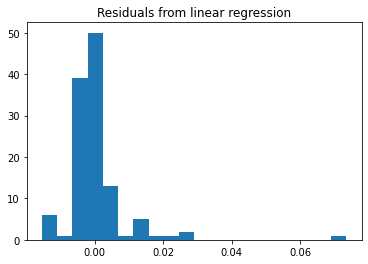

In [175]:
# The distribution of residuals can suggest to us which link function would be best (if not known a priori)
plt.hist(mean_response-rfmodel.predict(X), bins=20)
plt.title('Residuals from linear regression')
plt.show()

In [179]:
mean_response = mean_response_all_cells[:,cell_idx]

X_train, X_test, y_train, y_test = train_test_split(X, mean_response, test_size=0.5, random_state=42)

In [199]:
glm_poisson = PoissonRegressor(alpha=0)
glm_poisson.fit(X_train,y_train)

PoissonRegressor(alpha=0)

In [200]:
scr_train = glm_poisson.score(X_train,y_train)
print('Poisson score (D^2) on training set = ' + str(scr_train))

scr_test = glm_poisson.score(X_test,y_test)
print('Poisson score (D^2) on test set = ' + str(scr_test))

Poisson score (D^2) on training set = 0.39849871577508
Poisson score (D^2) on test set = 0.2113307889050916


In [205]:
glm_gamma = GammaRegressor(alpha=0)
glm_gamma.fit(X_train,y_train+.0000001) # needed to ensure all values >0

GammaRegressor(alpha=0)

In [206]:
scr_train = glm_gamma.score(X_train,y_train+.0000001)
print('Poisson score (D^2) on training set = ' + str(scr_train))

scr_test = glm_gamma.score(X_test,y_test+.0000001)
print('Poisson score (D^2) on test set = ' + str(scr_test))

Poisson score (D^2) on training set = 0.18270530431030985
Poisson score (D^2) on test set = -1375.2790634861553


In [207]:
orientations,ix = np.unique(orientation,return_inverse=True)
print(orientations)

[  0.  45.  90. 135. 180. 225. 270. 315.]


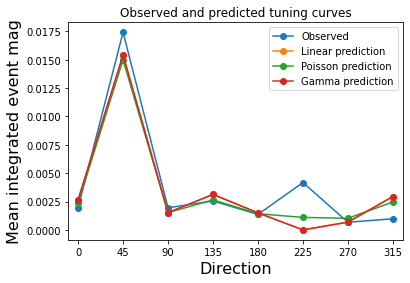

In [208]:
# Construct tuning curves under different models
tuning_obs = np.zeros(orientations.shape)
tuning_linear = np.zeros(orientations.shape)
tuning_poisson = np.zeros(orientations.shape)
tuning_gamma = np.zeros(orientations.shape)

for ii in range(orientations.shape[0]):
    tuning_obs[ii] = mean_response[ix==ii].mean()
    tuning_linear[ii] = rfmodel.predict(X[ix==ii,:]).mean()
    tuning_poisson[ii] = glm_poisson.predict(X[ix==ii,:]).mean()
    tuning_gamma[ii] = glm_gamma.predict(X[ix==ii,:]).mean()
    
fig,ax = plt.subplots()
ax.plot(orientations,tuning_obs, 'o-', label='Observed')
ax.plot(orientations,tuning_linear, 'o-', label='Linear prediction')
ax.plot(orientations,tuning_poisson, 'o-', label='Poisson prediction')
ax.plot(orientations,tuning_gamma, 'o-', label='Gamma prediction')

ax.set_xticks(orientations)
ax.set_xlim(-10,325)
ax.set_xlabel("Direction", fontsize=16)
ax.set_ylabel("Mean integrated event mag", fontsize=16)
plt.legend()
plt.title("Observed and predicted tuning curves")
plt.show()